In [179]:
!pip install -q pyomo
from pyomo.environ import *
!apt-get install -y -qq glpk-utils
!apt-get install -y -qq coinor-cbc

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [181]:
!pip -q install qpsolvers[open_source_solvers]
from qpsolvers import solve_qp

In [182]:
!pip install -i https://pypi.gurobi.com gurobipy
import gurobipy as gp

Looking in indexes: https://pypi.gurobi.com


In [183]:
#Question-1
#Approach -1
n=5
o1=[1,1,1,1,1]
c1=[85,92,45,27,31]
c2=[92,54,22,20,7]
c3=[96,67,29,20,11]
c4=[-91,-57,-33,-23,-12]
c5=[-99,-75,-26,-24,-41]
c6=[-98,-99,-57,-45,-65]
b= [1,1,1,1,1,1]
lst=[o1,c1,c2,c3,c4,c5,c6]
coeffOP1=pd.DataFrame(lst)


In [184]:
coeffOP1

,0,1,2,3,4
0,1,1,1,1,1
1,85,92,45,27,31
2,92,54,22,20,7
3,96,67,29,20,11
4,-91,-57,-33,-23,-12
5,-99,-75,-26,-24,-41
6,-98,-99,-57,-45,-65


In [185]:
model =ConcreteModel()
model.constraints= ConstraintList()
model.x= Var(np.arange(n),domain=Reals)
model.u=Var(np.arange(n),domain=Reals)

model.objective = Objective(expr=sum(model.u[i]*coeffOP1[i][0] for i in range(5)), sense=minimize)
for i in range(6):
  model.constraints.add(sum(coeffOP1[j][i+1]*model.x[j] for j in range(5)) >= b[i])

for i in range(n):


    model.constraints.add(expr = model.u[i] >= model.x[i])
    model.constraints.add(expr = model.u[i] >= -model.x[i])
    model.constraints.add(expr = model.u[i]>=0)



In [186]:
model.pprint()

3 Set Declarations
    constraints_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   21 : {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21}
    u_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    5 : {0, 1, 2, 3, 4}
    x_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    5 : {0, 1, 2, 3, 4}

2 Var Declarations
    u : Size=5, Index=u_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :  None :  None :  None : False :  True :  Reals
          1 :  None :  None :  None : False :  True :  Reals
          2 :  None :  None :  None : False :  True :  Reals
          3 :  None :  None :  None : False :  True :  Reals
          4 :  None :  None :  None : False :  True :  Reals
    x : Size=5, Index=x_index
        Key

In [187]:
LP = SolverFactory('cbc')
res = LP.solve(model)

In [188]:
print(res)


Problem: 
- Name: unknown
  Lower bound: 0.5479557323
  Upper bound: 0.5479557323
  Number of objectives: 1
  Number of constraints: 21
  Number of variables: 10
  Number of nonzeros: 5
  Sense: minimize
Solver: 
- Status: ok
  User time: -1.0
  System time: 0.0
  Wallclock time: 0.0
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: None
      Number of created subproblems: None
    Black box: 
      Number of iterations: 13
  Error rc: 0
  Time: 0.05385112762451172
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



In [189]:
model.objective()

0.547955725

In [190]:
for i in range(5):
  print('x',[i],model.x[i]())
  end=''
  print('u',[i],model.u[i]())

x [0] -0.046448575
u [0] 0.046448575
x [1] 0.18612441
u [1] 0.18612441
x [2] -0.17131802
u [2] 0.17131802
x [3] 0.0
u [3] 0.0
x [4] -0.14406472
u [4] 0.14406472


In [191]:
model2 =ConcreteModel()
model2.constraints= ConstraintList()
model2.a= Var(np.arange(n),domain=NonNegativeReals)
model2.b=Var(np.arange(n),domain=NonNegativeReals)

model2.objective = Objective(expr=sum(model2.b[i]+model2.a[i] for i in range(5)), sense=minimize)
for i in range(6):
  model2.constraints.add(sum(coeffOP1[j][i+1]*(model2.a[j]-model2.b[j]) for j in range(5)) >= b[i])



In [192]:
model2.pprint()

3 Set Declarations
    a_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    5 : {0, 1, 2, 3, 4}
    b_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    5 : {0, 1, 2, 3, 4}
    constraints_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    6 : {1, 2, 3, 4, 5, 6}

2 Var Declarations
    a : Size=5, Index=a_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :     0 :  None :  None : False :  True : NonNegativeReals
          1 :     0 :  None :  None : False :  True : NonNegativeReals
          2 :     0 :  None :  None : False :  True : NonNegativeReals
          3 :     0 :  None :  None : False :  True : NonNegativeReals
          4 :     0 :  None :  None : False :  True : NonNegativeReals
    b : Size=5, Index=b_index
        Key : Lowe

In [193]:
OP = SolverFactory('cbc')
res1 = OP.solve(model2)
print(res1)


Problem: 
- Name: unknown
  Lower bound: 0.5479557323
  Upper bound: 0.5479557323
  Number of objectives: 1
  Number of constraints: 6
  Number of variables: 10
  Number of nonzeros: 10
  Sense: minimize
Solver: 
- Status: ok
  User time: -1.0
  System time: 0.0
  Wallclock time: 0.0
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: None
      Number of created subproblems: None
    Black box: 
      Number of iterations: 5
  Error rc: 0
  Time: 0.018117189407348633
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



In [194]:
for i in range(5):
  print('a',[i],model2.a[i]())
  end=''
  print('b',[i],model2.b[i]())

a [0] 0.0
b [0] 0.046448575
a [1] 0.18612441
b [1] 0.0
a [2] 0.0
b [2] 0.17131802
a [3] 0.0
b [3] 0.0
a [4] 0.0
b [4] 0.14406472


In [195]:
#Answer-1
interest_rate = pd.read_csv('/content/Lab08_InterestRate (1).csv')
interest_rate

,Year,Interest Rate,Ratio,Rating
0,2003,0.0416,0.3615,85.6
1,2004,0.0312,0.2820,91.9
2,2005,0.0354,0.3010,89.1
3,2006,0.0331,0.3862,90.4
4,2007,0.0399,0.3578,86.3
5,2008,0.0501,0.4413,74.7
6,2009,0.0421,0.6753,79.8
7,2010,0.0507,0.6777,74.3
8,2011,0.0431,0.6585,84.4
9,2012,0.0437,0.6702,84.1


In [196]:
interest_rate.iloc[0][1]

0.0416

In [197]:
initial_Rate=[]
for i in range(20):
  initial_Rate.append(interest_rate.iloc[i][1])

initial_Rate=np.array(initial_Rate)

In [198]:
L=[]
for i in range(20):
  l=[]
  l.append(1)
  l.append(interest_rate.iloc[i][2])
  l.append(interest_rate.iloc[i][3])
  L.append(l)
L=np.array(L)
L

array([[ 1.    ,  0.3615, 85.6   ],
       [ 1.    ,  0.282 , 91.9   ],
       [ 1.    ,  0.301 , 89.1   ],
       [ 1.    ,  0.3862, 90.4   ],
       [ 1.    ,  0.3578, 86.3   ],
       [ 1.    ,  0.4413, 74.7   ],
       [ 1.    ,  0.6753, 79.8   ],
       [ 1.    ,  0.6777, 74.3   ],
       [ 1.    ,  0.6585, 84.4   ],
       [ 1.    ,  0.6702, 84.1   ],
       [ 1.    ,  0.3289, 86.8   ],
       [ 1.    ,  0.2473, 93.7   ],
       [ 1.    ,  0.2762, 92.3   ],
       [ 1.    ,  0.3222, 94.    ],
       [ 1.    ,  0.2792, 88.9   ],
       [ 1.    ,  0.3609, 74.3   ],
       [ 1.    ,  0.6187, 74.    ],
       [ 1.    ,  0.6176, 69.8   ],
       [ 1.    ,  0.6004, 81.6   ],
       [ 1.    ,  0.6119, 81.    ]])

In [199]:
p=2*np.matmul(L.transpose(),L)
p



array([[4.00000000e+01, 1.81496000e+01, 3.35400000e+03],
       [1.81496000e+01, 9.25515268e+00, 1.49040692e+03],
       [3.35400000e+03, 1.49040692e+03, 2.83313880e+05]])

In [200]:
q=-2*np.matmul(initial_Rate.transpose(),L)
q

array([  -1.635     ,   -0.77927632, -134.82612   ])

In [201]:
result=solve_qp(p,q,G=None,h=None,A=None,b=None,lb=None,ub=None,solver='osqp')
result

/usr/local/lib/python3.10/dist-packages/qpsolvers/conversions/ensure_sparse_matrices.py:38: UserWarning: Converted P to scipy.sparse.csc.csc_matrix
For best performance, build P as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(


array([ 0.12237613,  0.00576031, -0.00100316])

In [202]:
import seaborn as sns

<ipython-input-203-d7240417d72d>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = years, y= initial_Rate, palette='pastel', marker='o',color = 'green', label = 'initial_rate')
<ipython-input-203-d7240417d72d>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = years, y = forecast, palette = 'pastel', marker='s', color = 'black', label = 'Predicted')


([<matplotlib.axis.XTick at 0x7d034e302740>,
 [Text(2003, 0, '2003'),
  Text(2004, 0, '2004'),
  Text(2005, 0, '2005'),
  Text(2006, 0, '2006'),
  Text(2007, 0, '2007'),
  Text(2008, 0, '2008'),
  Text(2009, 0, '2009'),
  Text(2010, 0, '2010'),
  Text(2011, 0, '2011'),
  Text(2012, 0, '2012'),
  Text(2013, 0, '2013'),
  Text(2014, 0, '2014'),
  Text(2015, 0, '2015'),
  Text(2016, 0, '2016'),
  Text(2017, 0, '2017'),
  Text(2018, 0, '2018'),
  Text(2019, 0, '2019'),
  Text(2020, 0, '2020'),
  Text(2021, 0, '2021'),
  Text(2022, 0, '2022')])

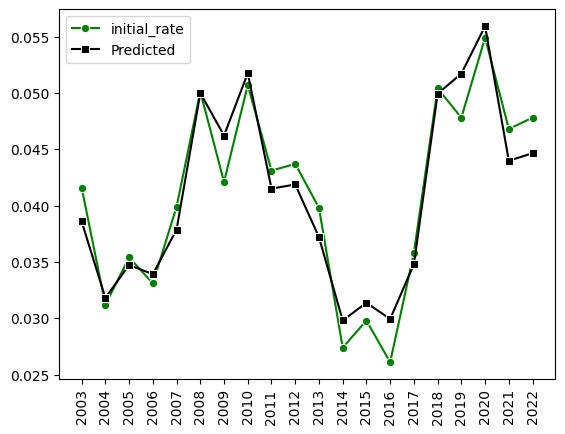

In [203]:
x=np.array(result)
forecast=np.matmul(L,x)
years = interest_rate.Year.to_list()
sns.lineplot(x = years, y= initial_Rate, palette='pastel', marker='o',color = 'green', label = 'initial_rate')
sns.lineplot(x = years, y = forecast, palette = 'pastel', marker='s', color = 'black', label = 'Predicted')
plt.xticks(years, rotation = 90)

In [204]:
#with lower bound of b0
d=np.array([0,-np.Inf,-np.Inf])
res_d=solve_qp(p,q,G=None,h=None,A=None,b=None,lb=d,ub=None,solver='osqp')
res_d

/usr/local/lib/python3.10/dist-packages/qpsolvers/conversions/ensure_sparse_matrices.py:38: UserWarning: Converted P to scipy.sparse.csc.csc_matrix
For best performance, build P as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/osqp/utils.py:122: UserWarning: Converting sparse A to a CSC (compressed sparse column) matrix. (It may take a while...)
  warn("Converting sparse A to a CSC " +


array([ 0.09128332,  0.01686998, -0.00069351])

<ipython-input-205-23fe043be389>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = years, y= initial_Rate, palette='pastel', marker='o',color = 'green', label = 'Actual_rate')
<ipython-input-205-23fe043be389>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = years, y = forecast, palette = 'pastel', marker='s', color = 'black', label = 'Predicted')


([<matplotlib.axis.XTick at 0x7d034e186e90>,
 [Text(2003, 0, '2003'),
  Text(2004, 0, '2004'),
  Text(2005, 0, '2005'),
  Text(2006, 0, '2006'),
  Text(2007, 0, '2007'),
  Text(2008, 0, '2008'),
  Text(2009, 0, '2009'),
  Text(2010, 0, '2010'),
  Text(2011, 0, '2011'),
  Text(2012, 0, '2012'),
  Text(2013, 0, '2013'),
  Text(2014, 0, '2014'),
  Text(2015, 0, '2015'),
  Text(2016, 0, '2016'),
  Text(2017, 0, '2017'),
  Text(2018, 0, '2018'),
  Text(2019, 0, '2019'),
  Text(2020, 0, '2020'),
  Text(2021, 0, '2021'),
  Text(2022, 0, '2022')])

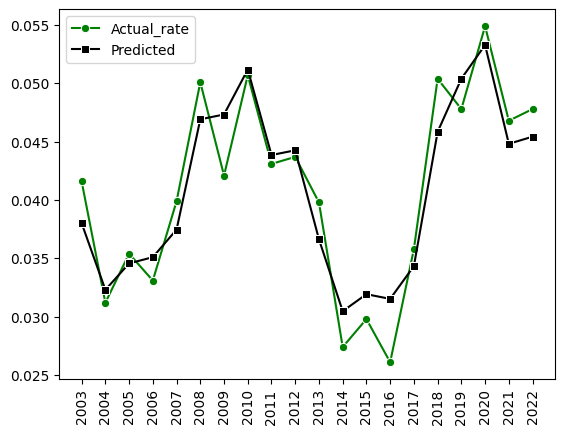

In [205]:
x1=np.array(res_d)
forecast=np.matmul(L,x1)
years = interest_rate.Year.to_list()
sns.lineplot(x = years, y= initial_Rate, palette='pastel', marker='o',color = 'green', label = 'Actual_rate')
sns.lineplot(x = years, y = forecast, palette = 'pastel', marker='s', color = 'black', label = 'Predicted')
plt.xticks(years, rotation = 90)

In [206]:
forecast

array([0.0380174 , 0.03230713, 0.03456948, 0.03510524, 0.03746952,
       0.04692288, 0.04733355, 0.05118835, 0.04385999, 0.04426543,
       0.03663523, 0.03047342, 0.03193188, 0.03152893, 0.03434042,
       0.04584394, 0.05040107, 0.05329525, 0.04482168, 0.04543179])

In [207]:
initial_Rate[1]

0.0312

In [208]:
model_2 =ConcreteModel()
model_2.constraints= ConstraintList()
model_2.x= Var(np.arange(3),domain=Reals)
model_2.u=Var(np.arange(3),domain=Reals)

model_2.objective = Objective(expr=sum(initial_Rate[i]-(1*model_2.u[0]+interest_rate.iloc[i][2]*model_2.u[1]+interest_rate.iloc[i][3]*model_2.u[2]) for i in range(20)), sense=minimize)
for i in range(20):
  model_2.constraints.add(expr=initial_Rate[i]-(1*model_2.u[0]+interest_rate.iloc[i][2]*model_2.u[1]+interest_rate.iloc[i][3]*model_2.u[2])>=0)
for i in range(3):


    model_2.constraints.add(expr = model_2.u[i] >= model_2.x[i])
    model_2.constraints.add(expr = model_2.u[i] >= -model_2.x[i])
    model_2.constraints.add(expr = model_2.u[i]>=0)



In [209]:
model_2.pprint()

3 Set Declarations
    constraints_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   29 : {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29}
    u_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    3 : {0, 1, 2}
    x_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    3 : {0, 1, 2}

2 Var Declarations
    u : Size=3, Index=u_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :  None :  None :  None : False :  True :  Reals
          1 :  None :  None :  None : False :  True :  Reals
          2 :  None :  None :  None : False :  True :  Reals
    x : Size=3, Index=x_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :  None :  None :  None : False :  True 

In [210]:
optOP = SolverFactory('cbc')
result_1 = optOP.solve(model_2)
print(result_1)


Problem: 
- Name: unknown
  Lower bound: 0.1762907108
  Upper bound: 0.1762907108
  Number of objectives: 1
  Number of constraints: 29
  Number of variables: 7
  Number of nonzeros: 3
  Sense: minimize
Solver: 
- Status: ok
  User time: -1.0
  System time: 0.0
  Wallclock time: 0.0
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: None
      Number of created subproblems: None
    Black box: 
      Number of iterations: 4
  Error rc: 0
  Time: 0.02637767791748047
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



In [211]:
for i in range(3):
  print('x',[i],model_2.x[i]())
  end=''
  print('u',[i],model_2.u[i]())

x [0] 0.01150017
u [0] 0.01150017
x [1] 0.045312943
u [1] 0.045312943
x [2] 0.0
u [2] 0.0


In [212]:
print(model_2.objective())


0.17629070486360002


In [216]:
#Answer-3


In [217]:
#Op-1
model_op1 = ConcreteModel()
n = 20
model_op1.z = Var(np.arange(n))
model_op1.b= Var(np.arange(3))
model_op1.obj = Objective(expr = sum(model_op1.z[i] for i in range(n)), sense = minimize)
model_op1.constraints = ConstraintList()
for i in range(n):
  model_op1.constraints.add( expr = initial_Rate[i] - model_op1.b[0] - model_op1.b[1]*interest_rate.iloc[i][2] - model_op1.b[2]*interest_rate.iloc[i][3] <= model_op1.z[i])
  model_op1.constraints.add( expr = -initial_Rate[i] + model_op1.b[0] + model_op1.b[1]*interest_rate.iloc[i][2] + model_op1.b[2]*interest_rate.iloc[i][3] <= model_op1.z[i])
  model_op1.constraints.add(expr = model_op1.z[i]>=0)
model_op1.constraints.add(expr = model_op1.b[0] >= 0)
model_op1.pprint()

3 Set Declarations
    b_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    3 : {0, 1, 2}
    constraints_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   61 : {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61}
    z_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   20 : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}

2 Var Declarations
    b : Size=3, Index=b_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :  None :  None :  None : False :  True :  Reals
          1 :  None :  None :  None : False :  True :  Reals
          2 :  

In [218]:
#OP2:
model_op2 = ConcreteModel()
n = 20
model_op2.x = Var(np.arange(n))
model_op2.y= Var(np.arange(n))
model_op2.b = Var(np.arange(3))
model_op2.obj = Objective(expr = sum(model_op2.x[i] + model_op2.y[i] for i in range(n)), sense = minimize)
model_op2.constraints = ConstraintList()
for i in range(n):
  model_op2.constraints.add( expr = initial_Rate[i] - model_op2.b[0] - model_op2.b[1]*interest_rate.iloc[i][2] - model_op2.b[2]*interest_rate.iloc[i][3] == model_op2.x[i]- model_op2.y[i])
  model_op2.constraints.add(expr = model_op2.x[i]>=0)
  model_op2.constraints.add(expr = model_op2.y[i]>=0)
model_op2.constraints.add(expr = model_op2.b[0] >= 0)
model_op2.pprint()

4 Set Declarations
    b_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    3 : {0, 1, 2}
    constraints_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   61 : {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61}
    x_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   20 : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
    y_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   20 : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}

3 Var Declarations
    b : Size=3, Index=b

In [219]:
optOP = SolverFactory('cbc')
result_op1 = optOP.solve(model_op1)
print(result_op1)


Problem: 
- Name: unknown
  Lower bound: 0.0379290902
  Upper bound: 0.0379290902
  Number of objectives: 1
  Number of constraints: 61
  Number of variables: 23
  Number of nonzeros: 20
  Sense: minimize
Solver: 
- Status: ok
  User time: -1.0
  System time: 0.0
  Wallclock time: 0.0
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: None
      Number of created subproblems: None
    Black box: 
      Number of iterations: 22
  Error rc: 0
  Time: 0.05602836608886719
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



In [220]:
model_op1.obj()

0.0379290903

In [221]:
aoptOP = SolverFactory('cbc')
result_op2= optOP.solve(model_op2)
print(result_op2)


Problem: 
- Name: unknown
  Lower bound: 0.0379290902
  Upper bound: 0.0379290902
  Number of objectives: 1
  Number of constraints: 61
  Number of variables: 43
  Number of nonzeros: 40
  Sense: minimize
Solver: 
- Status: ok
  User time: -1.0
  System time: 0.0
  Wallclock time: 0.0
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: None
      Number of created subproblems: None
    Black box: 
      Number of iterations: 20
  Error rc: 0
  Time: 0.06438469886779785
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



In [222]:
model_op2.obj()

0.0379290903

In [223]:
bi=[]
for i in range(3):
  a=model_op1.b[i]()
  bi.append(a)
bi

[0.11547155, 0.0093102734, -0.00093012282]

In [224]:
forecast_linear=[]
for i in range(20):
  forecast_linear.append(bi[0]+interest_rate.iloc[i][2]*bi[1]+interest_rate.iloc[i][3]*bi[2])
forecast_linear=np.array(forecast_linear)
forecast_linear

array([0.0392187 , 0.03261876, 0.0354    , 0.03498407, 0.03853317,
       0.0501    , 0.04753498, 0.052673  , 0.0431    , 0.04348797,
       0.03779904, 0.03062147, 0.03219271, 0.03103978, 0.03538306,
       0.0497235 , 0.05240273, 0.056299  , 0.04516342, 0.04582856])

<ipython-input-225-7728ffda1775>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = years, y= initial_Rate, palette='pastel', marker='o',color = 'black', label = 'Actual_rate')
<ipython-input-225-7728ffda1775>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = years, y = forecast, palette = 'pastel', marker='s', color = 'yellow', label = 'Forecast')
<ipython-input-225-7728ffda1775>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = years, y = forecast_linear, palette = 'pastel', marker='d', color = 'pink', label = 'Forecast_linear')


([<matplotlib.axis.XTick at 0x7d034e09f700>,
 [Text(2003, 0, '2003'),
  Text(2004, 0, '2004'),
  Text(2005, 0, '2005'),
  Text(2006, 0, '2006'),
  Text(2007, 0, '2007'),
  Text(2008, 0, '2008'),
  Text(2009, 0, '2009'),
  Text(2010, 0, '2010'),
  Text(2011, 0, '2011'),
  Text(2012, 0, '2012'),
  Text(2013, 0, '2013'),
  Text(2014, 0, '2014'),
  Text(2015, 0, '2015'),
  Text(2016, 0, '2016'),
  Text(2017, 0, '2017'),
  Text(2018, 0, '2018'),
  Text(2019, 0, '2019'),
  Text(2020, 0, '2020'),
  Text(2021, 0, '2021'),
  Text(2022, 0, '2022')])

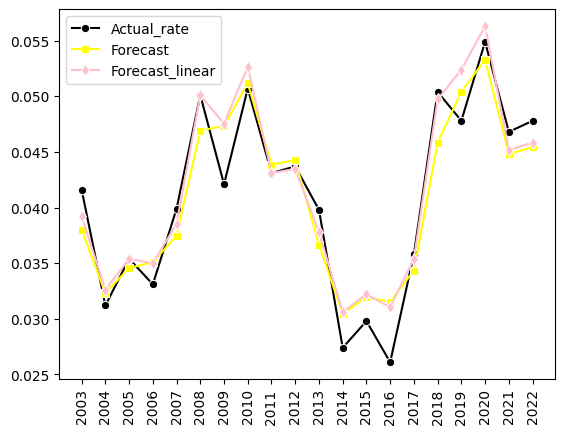

In [225]:

years = interest_rate.Year.to_list()
sns.lineplot(x = years, y= initial_Rate, palette='pastel', marker='o',color = 'black', label = 'Actual_rate')
sns.lineplot(x = years, y = forecast, palette = 'pastel', marker='s', color = 'yellow', label = 'Forecast')
sns.lineplot(x = years, y = forecast_linear, palette = 'pastel', marker='d', color = 'pink', label = 'Forecast_linear')
plt.xticks(years, rotation = 90)

# Answer 2

In [226]:
!pip -q install qpsolvers[open_source_solvers]
from qpsolvers import solve_qp
import numpy as np


P = np.array([[12.982, 0, 0, 0],
            [0, 2.4, 0, 0],
            [0, 0, 0.44, -0.051],
            [0, 0, -0.051,0.068]])

q = np.array([-6748, -1184, -420.625, -70.41])


# G matrix representation of coefficients of inequality constraints
G = np.array([[-25.964, -96, -7.08, 0.025],
            [-58.419, -2.4, -5.56, 17.39],
            [1, 0, 0, 0],
            [0, 1, 0, 0],
            [0, 0, 0.22, -0.025],
            [0, 0, -0.026,0.034]])
# h vector representation of capacity bounds for inequality constraints
h = np.array([59861805, 74921464, 1039.59, 986.66, 420.625,70.41])

p=solve_qp(P, q, G, h, None, None, None, None,solver="osqp")

/usr/local/lib/python3.10/dist-packages/qpsolvers/conversions/ensure_sparse_matrices.py:38: UserWarning: Converted P to scipy.sparse.csc.csc_matrix
For best performance, build P as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/qpsolvers/conversions/ensure_sparse_matrices.py:38: UserWarning: Converted G to scipy.sparse.csc.csc_matrix
For best performance, build G as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(


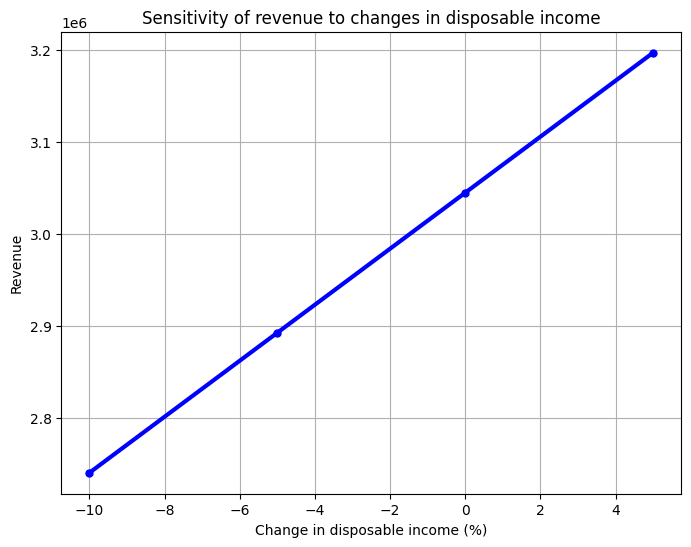

In [227]:
import numpy as np
import matplotlib.pyplot as plt


prices = p

# Define the range of change in disposable income (-10% to 10%)
income_change = np.arange(-0.10, 0.06, 0.05)

# Calculate revenue for each change in disposable income
revenues = []
for change in income_change:
    # Calculate new prices based on the change in disposable income
    new_prices = prices * (1 + change)
    # Calculate revenue using the new prices and last year's consumption data
    revenue = np.dot(new_prices, np.array([4820, 320, 210,70]))  # Assuming last year's consumption data for P1, P2, P3
    revenues.append(revenue)


plt.figure(figsize=(8, 6))
plt.plot(income_change * 100, revenues, marker='o', color='b', linestyle='-', linewidth=3, markersize=5)
plt.xlabel('Change in disposable income (%)')
plt.ylabel('Revenue')
plt.title('Sensitivity of revenue to changes in disposable income')
plt.grid(True)
plt.show()